# Training Dataset: HRPlanesV2

### HRPlanesv2 - High Resolution Satellite Imagery for Aircraft Detection

The **HRPlanesV2** dataset comprises 2120 Very High-Resolution (VHR) Google Earth images, carefully selected to enhance experimental results. These images capture airports from diverse regions, featuring a range of uses including civil, military, and joint operations. A meticulous labeling process has identified and annotated a total of 14,335 aircraft within the dataset.

- **Image Format**: Each image is stored as a ".jpg" file, with dimensions of 4800 x 2703 pixels.
- **Labeling Format**: Labels are stored in YOLO ".txt" format, ensuring compatibility with popular object detection frameworks.

To facilitate experimentation, the dataset has been partitioned into three sets:
- **Train Set**: 70% of the data for training.
- **Validation Set**: 20% of the data for model validation.
- **Test Set**: The remaining 10% reserved for testing.

Notably, aircraft within the train and validation sets are specifically chosen to have a size representation of 80% or more within the images, enhancing the model's ability to generalize.

Explore the dataset on [GitHub](https://github.com/dilsadunsal/HRPlanesv2-Data-Set) for further details and access to the data.

In [4]:
!wget https://www.kaggle.com/datasets/airbusgeo/airbus-aircrafts-sample-dataset/download?datasetVersionNumber=3

--2023-06-05 10:59:29--  https://www.kaggle.com/datasets/airbusgeo/airbus-aircrafts-sample-dataset/download?datasetVersionNumber=3
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fairbusgeo%2Fairbus-aircrafts-sample-dataset%2Fversions%2F3%3Fresource%3Ddownload [following]
--2023-06-05 10:59:29--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fairbusgeo%2Fairbus-aircrafts-sample-dataset%2Fversions%2F3%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=3’

download?datasetVer     [ <=

# Annotation Formats: YOLO (txt) and COCO (json)

- **YOLO** (txt) annotation format

    The YOLO (You Only Look Once) annotation format is a popular choice for object detection tasks. In this format, each image's annotations are stored in a corresponding ".txt" file. Each line in the file represents a labeled object and includes information such as the class, center coordinates, and dimensions.

- **COCO** (json) annotation format

    COCO (Common Objects in Context) is another widely used annotation format, stored in a structured JSON (JavaScript Object Notation) file. COCO annotations provide comprehensive information about each image, including object categories, bounding box coordinates, and segmentation masks.

### Dataset Conversion

While YOLO is a common annotation format, some models and frameworks may prefer or exclusively accept the COCO format. To ensure compatibility with such models, it becomes necessary to convert datasets like HRPlanesV2 from YOLO to COCO.

### Convert HRPlanesV2 to COCO Format

To convert the HRPlanesV2 dataset from YOLO to COCO, you can use the open-source converter available at [Taeyoung96/Yolo-to-COCO-format-converter](https://github.com/Taeyoung96/Yolo-to-COCO-format-converter). Follow the instructions provided in the repository to seamlessly transform your annotations from YOLO ".txt" files to COCO ".json" files.
This conversion step ensures that your HRPlanesV2 dataset is compatible with a broader range of object detection models that accept the COCO annotation format.


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Annotation Check

### YOLO Annotation

Let's test the YOLO annotation by drawing the bbox on the corresponding image.

The provided Python script visualizes a random sample of images annotated using the YOLO (You Only Look Once) object detection format. The key components are:

- **`visualize_random_yolo_samples` Function:**
  - Randomly selects image files with '.jpg' extension from a specified folder.
  - Constructs corresponding annotation file paths.
  - Calls `visualize_yolo_annotations` to display images with bounding box annotations.

- **`random_sample_files` Function:**
  - Utility function for randomly sampling files from a folder with a given extension.

- **`read_yolo_annotation` Function:**
  - Reads YOLO annotation files, extracting class ID and bounding box coordinates.

- **`visualize_yolo_annotations` Function:**
  - Reads image and YOLO annotations using OpenCV.
  - Calculates bounding box coordinates in pixels.
  - Draws rectangles around detected objects and displays the result.

- **Example Usage:**
  - Set `folder_yolo` to the path containing YOLO-formatted images and annotations.
  - Call `visualize_random_yolo_samples` to visualize a random sample of annotated images.

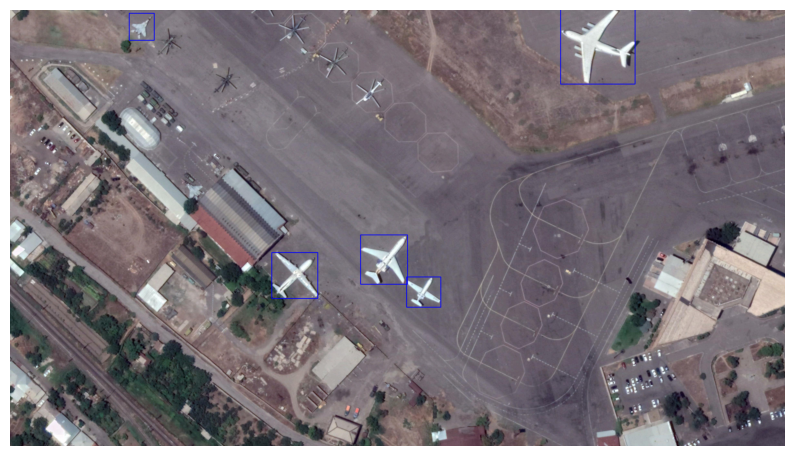

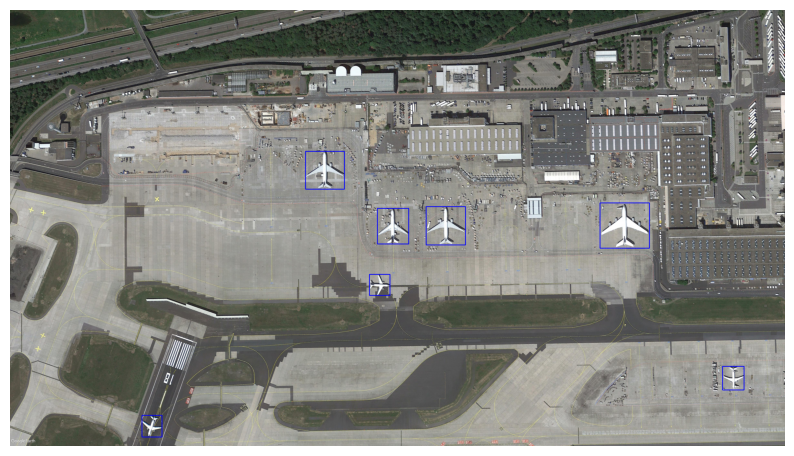

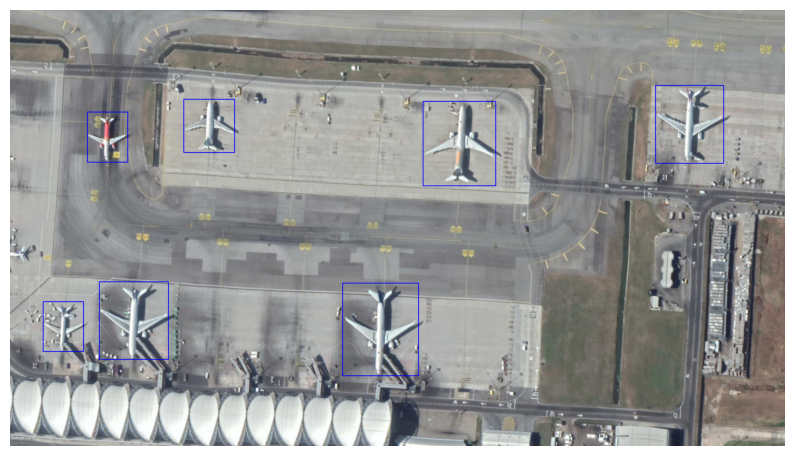

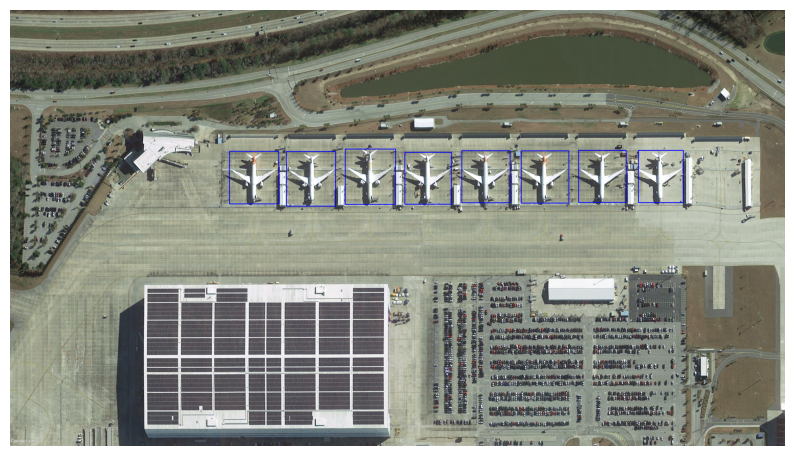

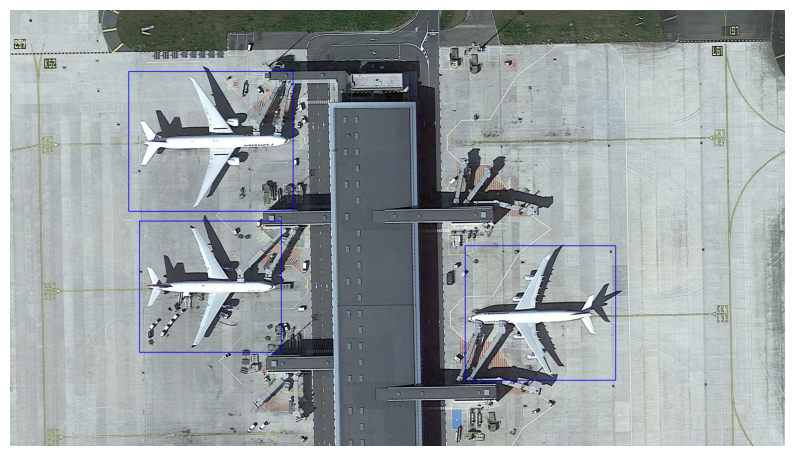

In [21]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def visualize_random_yolo_samples(folder):
    image_files = random_sample_files(folder, '.jpg')
    for image_file in image_files:
        image_path = os.path.join(folder, image_file)
        annotation_file = image_file.replace('.jpg', '.txt')
        annotation_path = os.path.join(folder, annotation_file)
        
        visualize_yolo_annotations(image_path, annotation_path)

def random_sample_files(folder, extension, num_samples=5):
    files = [file for file in os.listdir(folder) if file.endswith(extension)]
    return random.sample(files, min(num_samples, len(files)))

def read_yolo_annotation(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    annotations = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x, y, w, h = map(float, parts[1:])
        annotations.append({'class_id': class_id, 'x': x, 'y': y, 'w': w, 'h': h})
    
    return annotations

def visualize_yolo_annotations(image_path, annotation_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    annotations = read_yolo_annotation(annotation_path)

    for annotation in annotations:
        x, y, w, h = map(int, [annotation['x'] * width, annotation['y'] * height, annotation['w'] * width, annotation['h'] * height])
        x = max(0, x - w // 2)
        y = max(0, y - h // 2)
        
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)  # Blue color, thickness increased to 3

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example Usage
folder_yolo = './data/train'
visualize_random_yolo_samples(folder_yolo)



### COCO Annotation

Let's test the COCO annotation by drawing the bbox on the corresponding image.

The provided Python script visualizes a random sample of images annotated using the COCO (Common Objects in Context) object detection format. The key components are:

- **`visualize_annotations` Function:**
  - Uses PIL (Python Imaging Library) to open the image.
  - Draws bounding boxes and class labels based on COCO annotations.
  - Displays the result using Matplotlib.

- **`yolo2coco_visualization` Function:**
  - Loads the COCO-formatted JSON file containing image and annotation information.
  - Filters annotations for a selected image.
  - Calls `visualize_annotations` to display the image with bounding box annotations.

- **Example Usage:**
  - Set `image_folder_path` to the folder containing images.
  - Set `json_output_file` to the COCO-formatted JSON file path.
  - Call `yolo2coco_visualization` to visualize a random sample of images with COCO annotations.


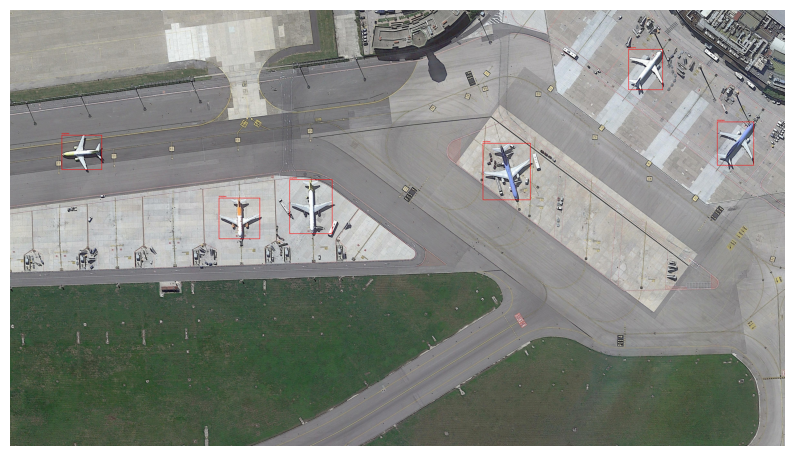

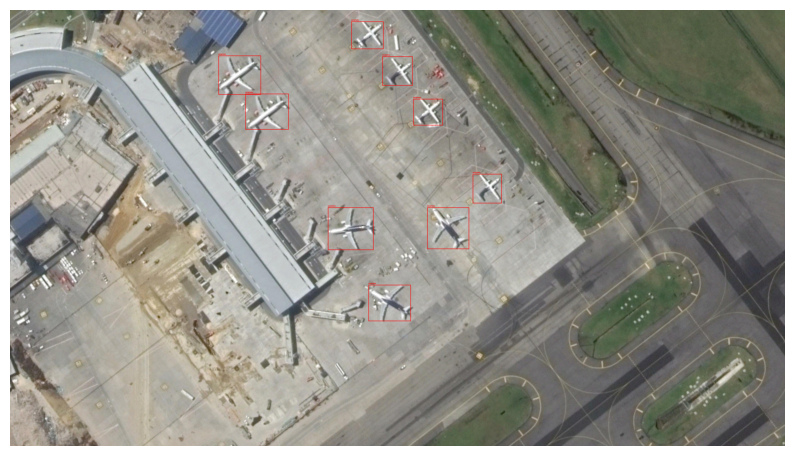

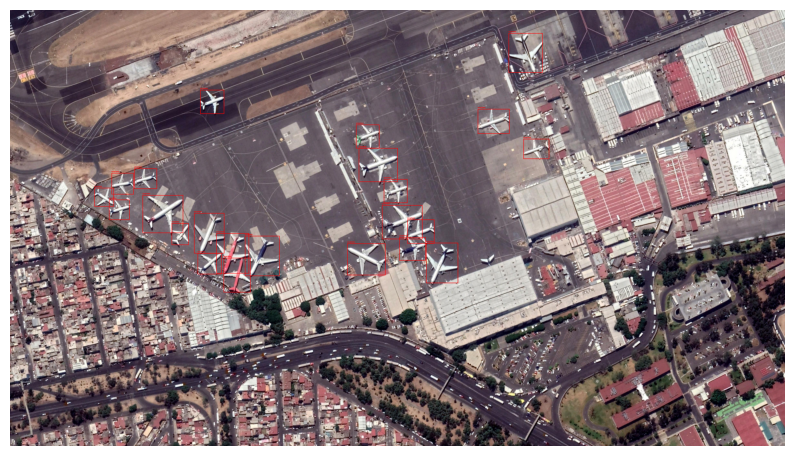

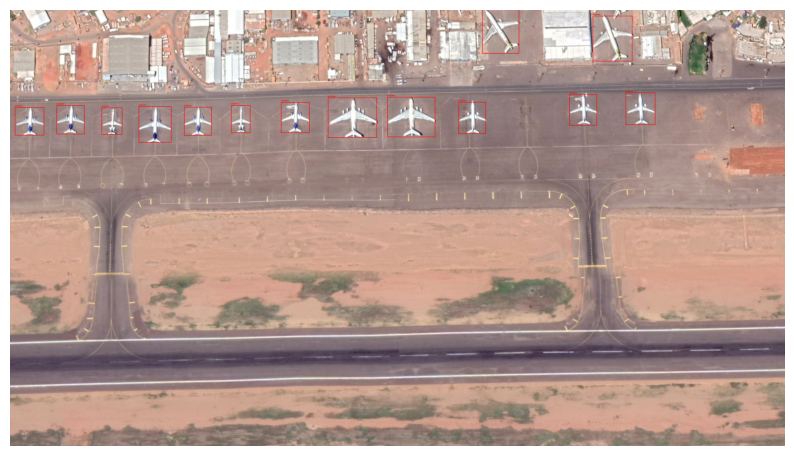

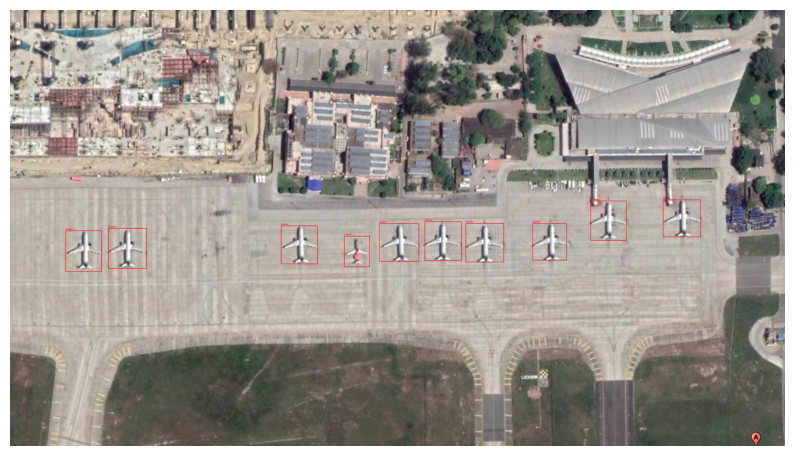

In [20]:
from PIL import Image, ImageDraw
import json
import random
import os
import matplotlib.pyplot as plt

def visualize_annotations(image_path, annotations, categories):
    image = Image.open(image_path)
    
    draw = ImageDraw.Draw(image)
    
    for annotation in annotations:
        bbox = annotation["bbox"]
        x, y, width, height = bbox
        category_id = annotation["category_id"]
        category = categories[category_id]
        
        # Draw bounding box
        draw.rectangle([x, y, x + width, y + height], outline=(255, 0, 0), width=3)
        
        # Add class label
        draw.text((x, y - 15), category, fill=(255, 0, 0), font=None)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def yolo2coco_visualization(image_path, json_output_file):
    # Load the JSON file
    with open(json_output_file, "r") as f:
        coco_format = json.load(f)
    
    images = coco_format["images"]
    annotations = coco_format["annotations"]
    categories = {category["id"]: category["name"] for category in coco_format["categories"]}
    
    # Filter annotations for the selected image
    image_id = None
    for image in images:
        if image["file_name"] == os.path.basename(image_path):
            image_id = image["id"]
            break
    
    if image_id is None:
        print("Image not found in the JSON file.")
        return
    
    image_annotations = [annotation for annotation in annotations if annotation["image_id"] == image_id]
    
    # Visualize the annotations
    visualize_annotations(image_path, image_annotations, categories)

# Specify the paths
image_folder_path = './data/test/'
json_output_file = "./data/test/__coco.json"

# Randomly select 5 images
with open(json_output_file, "r") as f:
    coco_format = json.load(f)
images = coco_format["images"]
random_images = random.sample(images, 5)

# Loop over the random images and visualize their annotations
for image in random_images:
    image_path = os.path.join(image_folder_path, image["file_name"])
    yolo2coco_visualization(image_path, json_output_file)
